In [11]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import ReLU
from src.activation_functions import Softmax
from src.loss_functions import CrossEntropy

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn.utils import shuffle as sk_shuffle

# Load data

In [12]:
from tensorflow.keras.datasets.fashion_mnist import load_data as load_data_MNIST

(x_train, y_train), (x_test, y_test) = load_data_MNIST()  # MNIST

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255
x_test /= 255

# Optional shuffle

### Because with current implementation, using full dataset might take long time

In [13]:
x_train, y_train = sk_shuffle(x_train, y_train)
x_test, y_test = sk_shuffle(x_test, y_test)

# Prepare data

In [14]:
x_train_expanded = np.expand_dims(x_train, 1)
x_test_expanded = np.expand_dims(x_test, 1)

In [15]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

y_train_encoded = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = one_hot_encoder.fit_transform(y_test.reshape(-1, 1))

# Check sample

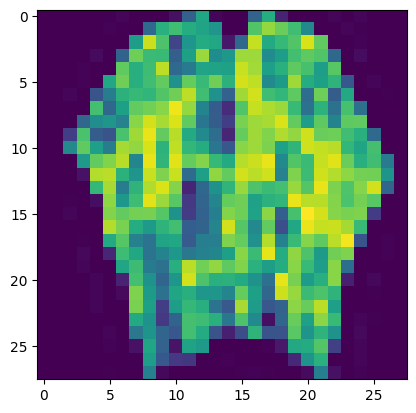

In [16]:
plt.imshow(np.einsum("chw -> hwc", x_train_expanded[0]))

# Create model and add layers

In [17]:
model = Sequential(input_size=(1, 28, 28), output_size=10)

In [18]:
model.add(Conv2D(n_outputs=5, filter_size=5, stride=2, padding=2))
model.add(Activation(ReLU()))
model.add(Conv2D(n_outputs=3, filter_size=3, stride=1, padding=2))
model.add(Activation(ReLU()))
model.add(Flatten())
model.add(Linear(n_outputs=120))
model.add(Activation(ReLU()))
model.add(Linear(n_outputs=84))
model.add(Activation(ReLU()))
model.add(Linear(n_outputs=10))
model.add(Activation(Softmax()))

In [19]:
model.summary()

Sequential {
	Conv2D(input size: (1, 28, 28), output size: (5, 14, 14), filter size: 5, stride: 2, padding: 2)
	Activation(ReLU)
	Conv2D(input size: (5, 14, 14), output size: (3, 16, 16), filter size: 3, stride: 1, padding: 2)
	Activation(ReLU)
	Flatten(input size: (3, 16, 16), outputs: 768)
	Linear(inputs: 768, outputs: 120)
	Activation(ReLU)
	Linear(inputs: 120, outputs: 84)
	Activation(ReLU)
	Linear(inputs: 84, outputs: 10)
	Activation(Softmax)
}


# Train model

In [20]:
model.fit(
    training_data=[x_train_expanded[:1000], y_train_encoded[:1000]],
    epochs=20,
    learning_rate=0.0001,
    loss_function=CrossEntropy(),
    batch_size=100,
    verbose=True,
    validation_data=[x_test_expanded[:1000], y_test_encoded[:1000]],
)

100%|██████████| 20/20 [01:10<00:00,  3.51s/it,  Train loss: 0.6187 Train accuracy: 0.79 Val loss: 0.8373 Val accuracy: 0.70]


# Evaluate results

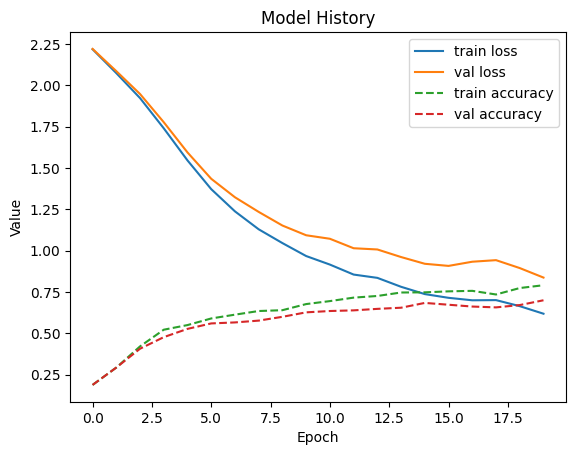

In [21]:
model.plot_history(["loss", "accuracy"])

In [22]:
y_pred = model.predict(x_test_expanded)
y_pred = np.argmax(y_pred, axis=1)

In [23]:
fashion_mnist_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

Accuracy: 0.7175
F1 score: 0.7166958353914008
BA score: 0.7175


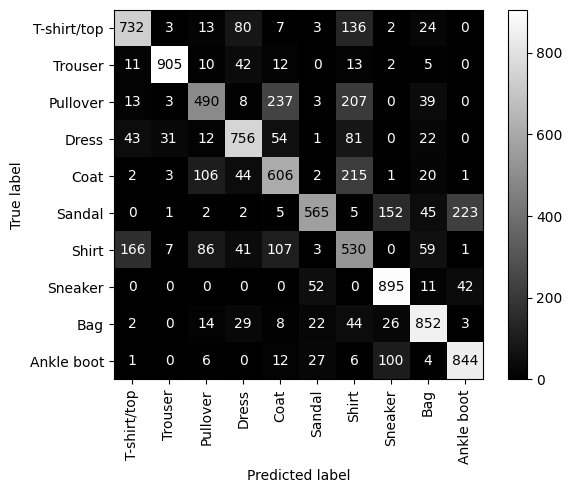

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score

cm_model = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
ConfusionMatrixDisplay(cm_model, display_labels=fashion_mnist_labels).plot(
    cmap="gray", xticks_rotation="vertical"
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average="weighted"))
print("BA score:", balanced_accuracy_score(y_test, y_pred))